In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.metrics import Precision, Recall, AUC
from keras.callbacks import EarlyStopping

In [2]:
path = '../malimg_dataset/'

In [3]:
familias = ImageDataGenerator().flow_from_directory(directory=path, target_size=(64,64), batch_size=10000)

Found 9339 images belonging to 1 classes.


In [4]:
familias.class_indices

{'malimg_paper_dataset_imgs': 0}

In [5]:
imgs, labels = next(familias)

In [6]:
imgs.shape

(9339, 64, 64, 3)

In [7]:
labels.shape

(9339, 1)

In [13]:
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(familias.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [9]:
!pip show keras
!pip show tensorflow

Name: keras
Version: 3.3.3
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: C:\Users\jupap\AppData\Roaming\Python\Python312\site-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, rich
Required-by: scikeras, tensorflow-intel
Name: tensorflow
Version: 2.16.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\jupap\AppData\Roaming\Python\Python312\site-packages
Requires: tensorflow-intel
Required-by: 


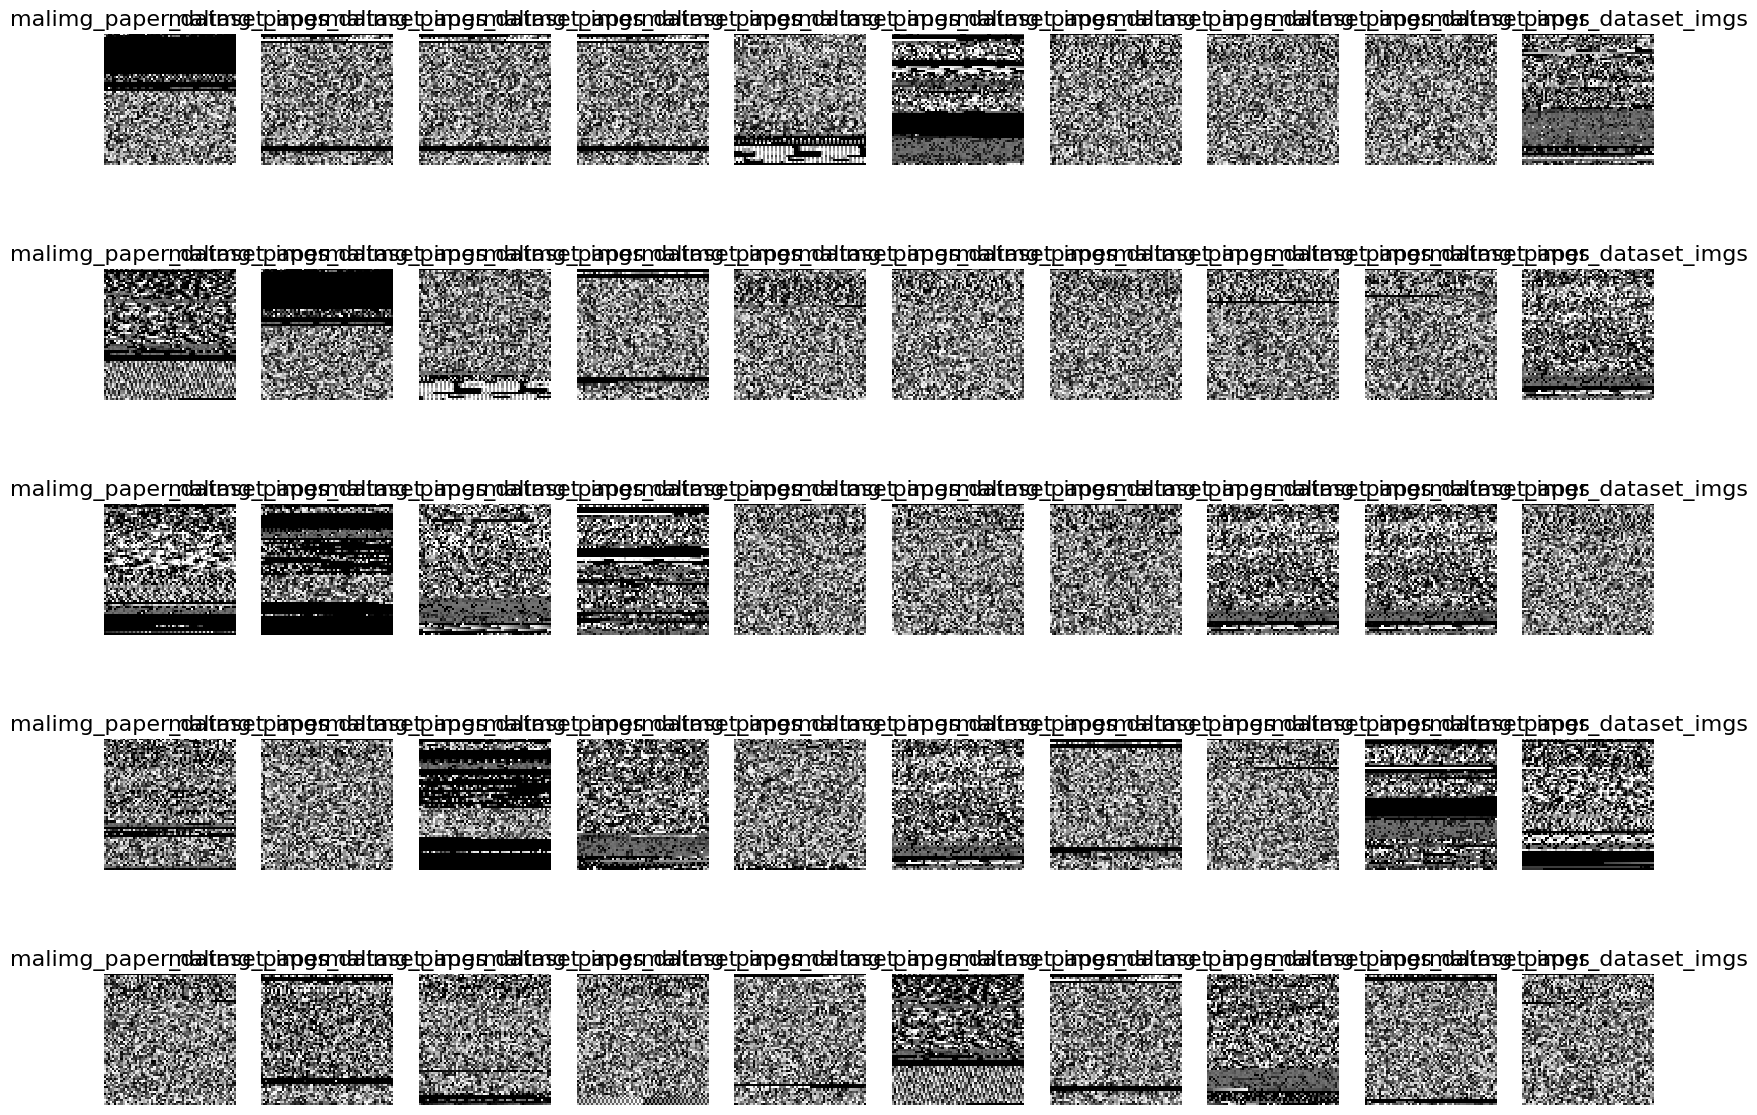

In [14]:
plots(imgs, titles = labels)

### Primera parte

In [15]:
path = '../malimg_dataset/'

datagen = ImageDataGenerator(rescale=1./255)

generator = datagen.flow_from_directory(
    directory=path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

classIndices = generator.class_indices
classCounts = {className: 0 for className in classIndices.keys()}

for _, labels in generator:
    for label in labels:
        className = list(classIndices.keys())[np.argmax(label)]
        classCounts[className] += 1
    if generator.batch_index == 0:
        break

for className, count in classCounts.items():
    print(f"{className}: {count}")

Found 9339 images belonging to 1 classes.
malimg_paper_dataset_imgs: 9339


In [16]:
allImages = []
allLabels = []

for _ in range(generator.samples // generator.batch_size + 1):
    imgs, labels = next(generator)
    allImages.append(imgs)
    allLabels.append(labels)

allImages = np.concatenate(allImages, axis=0)
allLabels = np.concatenate(allLabels, axis=0)

allImages = allImages[:generator.samples]
allLabels = allLabels[:generator.samples]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(allImages, allLabels, test_size=0.3, random_state=42)

print(X_train, X_test)

[[[[0.8941177  0.8941177  0.8941177 ]
   [0.00392157 0.00392157 0.00392157]
   [0.27058825 0.27058825 0.27058825]
   ...
   [0.         0.         0.        ]
   [0.07450981 0.07450981 0.07450981]
   [0.00784314 0.00784314 0.00784314]]

  [[0.27450982 0.27450982 0.27450982]
   [0.14117648 0.14117648 0.14117648]
   [0.         0.         0.        ]
   ...
   [0.2901961  0.2901961  0.2901961 ]
   [0.05882353 0.05882353 0.05882353]
   [0.01568628 0.01568628 0.01568628]]

  [[0.5176471  0.5176471  0.5176471 ]
   [0.92549026 0.92549026 0.92549026]
   [0.35686275 0.35686275 0.35686275]
   ...
   [0.3137255  0.3137255  0.3137255 ]
   [0.76470596 0.76470596 0.76470596]
   [0.01568628 0.01568628 0.01568628]]

  ...

  [[0.7137255  0.7137255  0.7137255 ]
   [0.8000001  0.8000001  0.8000001 ]
   [0.         0.         0.        ]
   ...
   [0.41176474 0.41176474 0.41176474]
   [0.43921572 0.43921572 0.43921572]
   [0.47450984 0.47450984 0.47450984]]

  [[0.42352945 0.42352945 0.42352945]
   [0.1

In [18]:
print("Shape of X_train:", X_train.shape)

Shape of X_train: (6537, 64, 64, 3)


In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

def create_model():
    model = Sequential([
        Conv2D(32, kernel_size=3, activation="relu", input_shape=(64, 64, 3)),  
        MaxPooling2D(pool_size=2),
        BatchNormalization(),  # Batch Normalization después de la primera capa de convolución
        Conv2D(64, kernel_size=3, activation="relu"),
        MaxPooling2D(pool_size=2),
        BatchNormalization(),  # Batch Normalization después de la segunda capa de convolución
        Flatten(),
        Dense(128, activation="relu", 
              kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),  
        Dropout(0.9),  # Ajustando la tasa de dropout
        Dense(10, activation="softmax")
    ])
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )

    return model

In [20]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

model = create_model()

model.fit(X_train, y_train, epochs=5, batch_size=256)

model.save("model.h5")

Epoch 1/5
26/26 [==============================] - 14s 496ms/step - loss: 17.8441 - accuracy: 0.7653
Epoch 2/5
26/26 [==============================] - 13s 485ms/step - loss: 12.1189 - accuracy: 0.9637
Epoch 3/5
26/26 [==============================] - 12s 474ms/step - loss: 6.9729 - accuracy: 0.9841
Epoch 4/5
26/26 [==============================] - 13s 483ms/step - loss: 3.6426 - accuracy: 0.9858
Epoch 5/5
26/26 [==============================] - 12s 479ms/step - loss: 1.8682 - accuracy: 0.9901


c:\Users\jupap\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Segunda parte

In [21]:
!pip install adversarial-robustness-toolbox

Cargando el modelo

In [22]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from art.estimators.classification import KerasClassifier

tf.compat.v1.disable_eager_execution()

model = load_model('model.h5')

classifier = KerasClassifier(model=model)

c:\Users\jupap\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\jupap\AppData\Local\Programs\Python\Python311\Lib\site-packages\art\estimators\certification\__init__.py:29: UserWarning: PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality
  warnings.warn("PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality")


Instructions for updating:
Colocations handled automatically by placer.


Ataque de evasión

In [23]:
from art.attacks.evasion import FastGradientMethod
from sklearn.metrics import accuracy_score

attackFgsm = FastGradientMethod(estimator=classifier, eps=0.001)  # eps controla la magnitud del ataque

x_test_adv = attackFgsm.generate(x=X_test)

predictionsNormal = classifier.predict(X_test)

y_test = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test
predictionsNormal = np.argmax(predictionsNormal, axis=1) if len(predictionsNormal.shape) > 1 else predictionsNormal

accuracyNormal = accuracy_score(y_test, predictionsNormal)
print(f"Accuracy en datos normales: {accuracyNormal * 100:.2f}%")

predictions = classifier.predict(x_test_adv)

predictions = np.argmax(predictions, axis=1) if len(predictions.shape) > 1 else predictions

accuracyFgsm = accuracy_score(y_test, predictions)
print(f"Accuracy en datos de ataque FGSM: {accuracyFgsm * 100:.2f}%")

c:\Users\jupap\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Accuracy en datos normales: 99.11%
Accuracy en datos de ataque FGSM: 98.89%


**Explicación del ataque de evasión:**
El código  en el cuadro pertenece a un ataque adversario usando el "Método de símbolo de gradiente rápido (FGSM) usando la biblioteca ART (Adversarial Robust Toolbox) en Python.
 Primero, importo la biblioteca FGSM y configuro el modelo de "clasificación" para el ataque y la fuerza del ataque (en este caso el eps es 0.1).
 Luego se crean las imágenes adversarias y se asignan a la variable "x_test_adv", modificando así las imágenes de prueba de la variable "X_test" para engañar al  modelo .
 evaluado en las imágenes  de prueba originales para lograr un nivel básico de precisión (es decir, "normal_accuracy"), mostrando así cómo se desempeña el modelo en condiciones normales con  imágenes adversas para ver cómo el ataque FGSM afecta su rendimiento, lo que ayuda a comprender la solidez del modelo.
 contra ataques adversarios.
 Este proceso es fundamental para la seguridad de los modelos de aprendizaje automático, ya que les permite identificar y mejorar la resistencia  a la manipulación maliciosa.



Ataque de extracción

In [25]:
import numpy as np
import tensorflow as tf
from art.estimators.classification import KerasClassifier
from art.attacks.extraction import CopycatCNN
from sklearn.metrics import accuracy_score

modelVictim = tf.keras.models.load_model('model.h5')

classifierVictim = KerasClassifier(model=modelVictim, clip_values=(0, 1))

thievedModel = create_model()

thievedClassifier = KerasClassifier(model=thievedModel, clip_values=(0, 1))

X_data = np.random.rand(100, 64, 64, 3)  

attack = CopycatCNN(classifier=classifierVictim, batch_size_fit=256, batch_size_query=256, nb_epochs=5, nb_stolen=100)

thievedClassifier = attack.extract(x=X_data, thieved_classifier=thievedClassifier)

predictions = thievedClassifier.predict(X_test)

if len(y_test.shape) > 1:
    y_test = np.argmax(y_test, axis=1)

if len(predictions.shape) > 1:
    predictions = np.argmax(predictions, axis=1)

predictionsOriginal = classifierVictim.predict(X_test)
if len(predictionsOriginal.shape) > 1:
    predictionsOriginal = np.argmax(predictionsOriginal, axis=1)

accuracyOriginal = np.mean(predictionsOriginal == y_test)
print(f"Accuracy del modelo original: {accuracyOriginal * 100:.2f}%")

accuracyThieved = np.mean(predictions == y_test)
print(f"Accuracy del thieved model: {accuracyThieved * 100:.2f}%")

c:\Users\jupap\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Accuracy del modelo original: 99.11%
Accuracy del thieved model: 97.00%


**Explicación del ataque de extracción:**

El código de ataque de extracción utiliza la técnica  Copycat CNN para robar características de un modelo previamente entrenado utilizando la biblioteca ART en Python.
 Primero, se importan las bibliotecas necesarias y se carga el modelo previamente entrenado, designado  como  modelo víctima.
 El modelo cargado se envuelve en un clasificador ART, estableciendo así sus valores de entrada entre 0 y 1.
 A continuación, se crea un nuevo modelo, llamado modelo robado, que también se envuelve en el clasificador ART.
 Se preparan 100 imágenes aleatorias de tamaño 64x64 en 3 canales (en este caso en color) para su uso en el ataque.
 El ataque Copycat CNN se configura con parámetros como el tamaño del lote y el número de épocas,  luego se ejecuta utilizando un clasificador de víctimas e imágenes aleatorias para entrenar el modelo robado que imita el comportamiento del modelo "original".
 Ambos modelos (víctima y ladrón) luego se evaluaron en el conjunto de pruebas "X_test", ajustando las predicciones y el etiquetado para calcular la precisión de la clasificación.
 Finalmente, se calcula y  compara la precisión del modelo original y el modelo robado, mostrando así la eficacia del modelo robado para imitar las características del modelo víctima.
 Lo anterior es importante para que el panorama de seguridad comprenda y mitigue los riesgos de ataques destinados a copiar características confidenciales del modelo.

